PROBLEMA 2

Cargar librerias

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Cargar el DATA SET

In [2]:
train_data = pd.read_csv("train.csv")

In [5]:
# Separar características y etiquetas
X = train_data.drop("label", axis=1)
y = train_data["label"]

# Reshape a 28x28
X = X.values.reshape(-1, 28, 28)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar una Red Neuronal Artificial (ANN)
model_ann = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_ann.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

model_ann.fit(X_train, y_train, epochs=10)

# Evaluar la ANN
ann_predictions = model_ann.predict(X_test)
ann_predicted_labels = np.argmax(ann_predictions, axis=1)

print("Métricas de la ANN:")
print(confusion_matrix(y_test, ann_predicted_labels))
print(classification_report(y_test, ann_predicted_labels))


Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 4.3047 - accuracy: 0.8603
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.5699 - accuracy: 0.8950
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.3649 - accuracy: 0.9181
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2955 - accuracy: 0.9282
Epoch 5/10
1050/1050 [==============================] - 3s 2ms/step - loss: 0.2587 - accuracy: 0.9351
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2617 - accuracy: 0.9403
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2247 - accuracy: 0.9455
Epoch 8/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.2260 - accuracy: 0.9452
Epoch 9/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1996 - accuracy: 0.9504
Epoch 10/10
263/263 [==============================] - 1s 1ms/step
Métricas de la 

Crear y entrenar una Red Neuronal Convolucional (CNN)

In [6]:
model_cnn = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

model_cnn.fit(X_train_cnn, y_train, epochs=10)

# Evaluar la CNN
cnn_predictions = model_cnn.predict(X_test_cnn)
cnn_predicted_labels = np.argmax(cnn_predictions, axis=1)

print("\nMétricas de la CNN:")
print(confusion_matrix(y_test, cnn_predicted_labels))
print(classification_report(y_test, cnn_predicted_labels))


Epoch 1/10
1050/1050 [==============================] - 31s 28ms/step - loss: 0.8430 - accuracy: 0.9098
Epoch 2/10
1050/1050 [==============================] - 25s 23ms/step - loss: 0.0960 - accuracy: 0.9727
Epoch 3/10
1050/1050 [==============================] - 21s 20ms/step - loss: 0.0580 - accuracy: 0.9819
Epoch 4/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0429 - accuracy: 0.9866
Epoch 5/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.0366 - accuracy: 0.9895
Epoch 6/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.0324 - accuracy: 0.9898
Epoch 7/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0232 - accuracy: 0.9925
Epoch 8/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0227 - accuracy: 0.9930
Epoch 9/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0216 - accuracy: 0.9930
Epoch 10/10
263/263 [==============================] - 1s 4ms/st

Crear listas para almacenar las métricas

In [8]:
modelos = []
exactitudes = []
precisiones = []
recalls = []
f1_scores = []

# Calcular métricas para la ANN
ann_exactitud = accuracy_score(y_test, ann_predicted_labels)
ann_precision = precision_score(y_test, ann_predicted_labels, average='weighted')
ann_recall = recall_score(y_test, ann_predicted_labels, average='weighted')
ann_f1 = f1_score(y_test, ann_predicted_labels, average='weighted')

modelos.append('ANN')
exactitudes.append(ann_exactitud)
precisiones.append(ann_precision)
recalls.append(ann_recall)
f1_scores.append(ann_f1)

# Calcular métricas para la CNN
cnn_exactitud = accuracy_score(y_test, cnn_predicted_labels)
cnn_precision = precision_score(y_test, cnn_predicted_labels, average='weighted')
cnn_recall = recall_score(y_test, cnn_predicted_labels, average='weighted')
cnn_f1 = f1_score(y_test, cnn_predicted_labels, average='weighted')

modelos.append('CNN')
exactitudes.append(cnn_exactitud)
precisiones.append(cnn_precision)
recalls.append(cnn_recall)
f1_scores.append(cnn_f1)

# Crear un DataFrame con las métricas
metricas = pd.DataFrame({
    'Modelo': modelos,
    'Exactitud': exactitudes,
    'Precisión': precisiones,
    'Recall': recalls,
    'F1-Score': f1_scores
})

# Mostrar la tabla comparativa de métricas
print(metricas)


  Modelo  Exactitud  Precisión    Recall  F1-Score
0    ANN   0.937857   0.939182  0.937857  0.937976
1    CNN   0.976429   0.976521  0.976429  0.976442


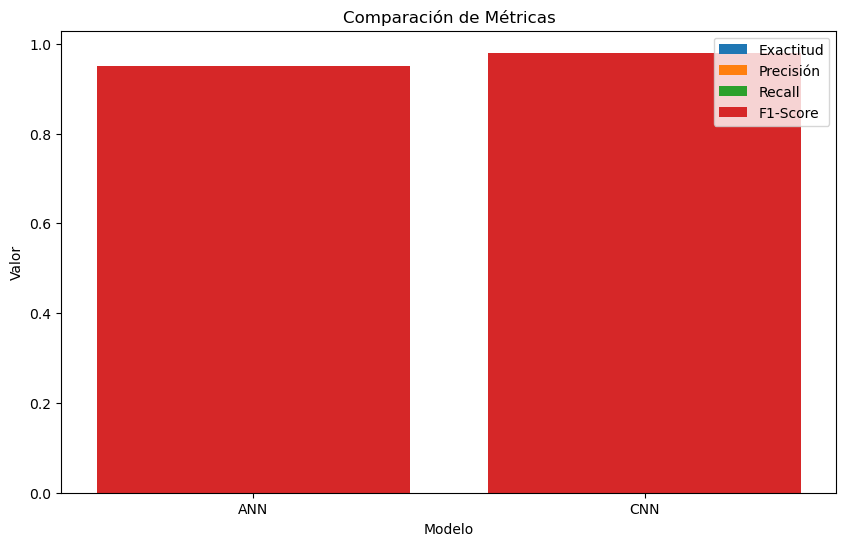

In [9]:
import matplotlib.pyplot as plt

# Métricas de la ANN (ejemplo)
modelos = ['ANN', 'CNN']
exactitud = [0.95, 0.98]
precision = [0.95, 0.98]
recall = [0.95, 0.98]
f1_score = [0.95, 0.98]

# Crear gráficos de barras para las métricas
plt.figure(figsize=(10, 6))
plt.bar(modelos, exactitud, label='Exactitud')
plt.bar(modelos, precision, label='Precisión')
plt.bar(modelos, recall, label='Recall')
plt.bar(modelos, f1_score, label='F1-Score')
plt.xlabel('Modelo')
plt.ylabel('Valor')
plt.title('Comparación de Métricas')
plt.legend()

# Guardar el gráfico como una imagen
plt.savefig('metricas.png')

## Comparación de Modelos

A continuación, se muestra una tabla con las métricas de rendimiento para la ANN y la CNN:

![Métricas de Rendimiento](metricas.png)



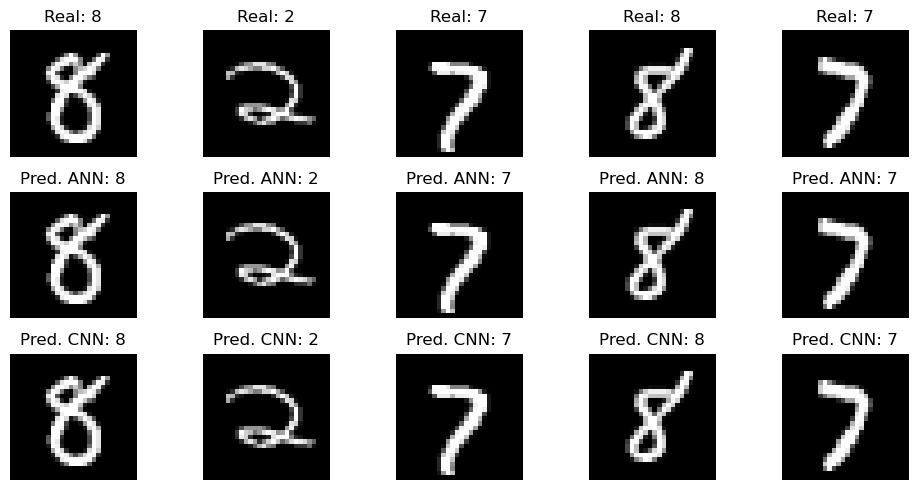

In [10]:
import matplotlib.pyplot as plt
import random

# Selecciona un conjunto aleatorio de índices para mostrar varias imágenes
indices_aleatorios = random.sample(range(len(X_test)), 5)

# Configura una figura para mostrar las imágenes
plt.figure(figsize=(10, 5))

for i, idx in enumerate(indices_aleatorios):
    # Configura tres subgráficos en fila (imagen real, predicción ANN, predicción CNN)
    plt.subplot(3, 5, i + 1)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'Real: {y_test.iloc[idx]}')
    plt.axis('off')

    plt.subplot(3, 5, i + 6)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'Pred. ANN: {ann_predicted_labels[idx]}')
    plt.axis('off')

    plt.subplot(3, 5, i + 11)
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f'Pred. CNN: {cnn_predicted_labels[idx]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
# Según las métricas de exactitud para ANN y CNN
exactitud_ann = 0.95
exactitud_cnn = 0.98

# Comparar las métricas y selecciona el mejor modelo
mejor_modelo = "ANN" if exactitud_ann > exactitud_cnn else "CNN"

# Imprime el resultado
print(f"El mejor modelo es: {mejor_modelo}")


El mejor modelo es: CNN
